# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Step -1: Install requirements

You should

    pip install -r requirements.txt

---
## Step 0: Load The Data

First download Udacity German Signs dataset and extract it to `dataset` folder. An original file will be stored as `traffic-signs-data.zip`.

In [1]:
import downloader

# Download Udacity German Signs dataset and extract it to dataset folder
DATASET_URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
downloader.download_and_extract(DATASET_URL, 'traffic-signs-data.zip', 'dataset')

print('Dataset extracted to "dataset" folder.')

Dataset extracted to "dataset" folder.


Then load dataset to memory:

In [2]:
import helpers

train = helpers.load_samples("dataset/train.p")
valid = helpers.load_samples("dataset/valid.p")
test = helpers.load_samples("dataset/test.p")

# check datasets
assert len(train.features) == len(train.labels)
assert len(valid.features) == len(valid.labels)
assert len(test.features) == len(test.labels)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(train.features)

n_validation = len(valid.features)

n_test = len(test.features)

# TODO: What's the shape of an traffic sign image?
image_shape = train.features[0].shape

all_classes = valid.labels_set.union(valid.labels_set).union(test.labels_set)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(all_classes)

print("Number of training examples =", n_train)
print("Number of testing examples = %s (%.2f %%)" %(n_test, n_test / n_train * 100))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630 (36.29 %)
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import numpy as np

Let's show a count of samples for each class:

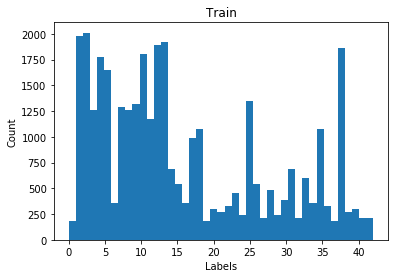

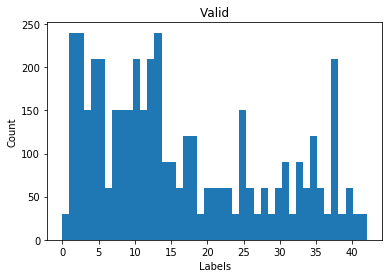

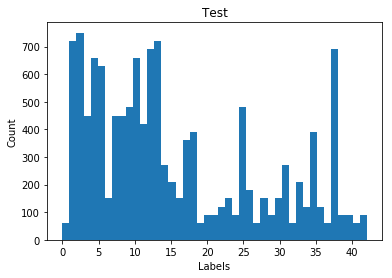

In [5]:
def show_hist(title, samples, n_classes):
    plt.hist(samples.labels, bins=n_classes)
    plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.xticks(range(0, 43, 5))
    plt.show()
    
show_hist('Train', train, n_classes)
show_hist('Valid', valid, n_classes)
show_hist('Test', test, n_classes)

Histograms are very similar, but there is not enough samples for several classes.

Following script shows one image per class:

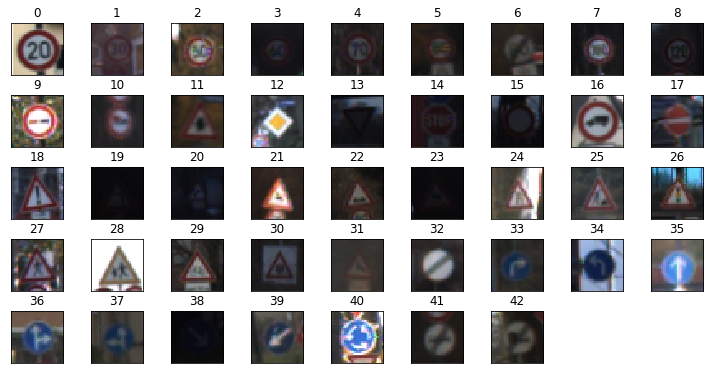

In [6]:
helpers.show_all_signs(train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

I decided to add more samples for train and valid datasets. I used tranditional transformations and color pertrubation:
* rotating for random angle (from -15 to 15 degrees)
* changing brightness
* changing contrast

In [7]:
import auglib

augmented_train = auglib.augment_samples(train, angle_degree=15,
                                         brightness_max_delta=0.1,
                                         contrast_lower=0.8, contrast_upper=1.2)

augmented_valid = auglib.augment_samples(valid, angle_degree=15,
                                         brightness_max_delta=0.1,
                                         contrast_lower=0.8, contrast_upper=1.2)

train = train.append(augmented_train)
valid = valid.append(augmented_valid)

n_train = len(train.features)

n_validation = len(valid.features)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)

Number of training examples = 69598
Number of validation examples = 8820


Augmented images:

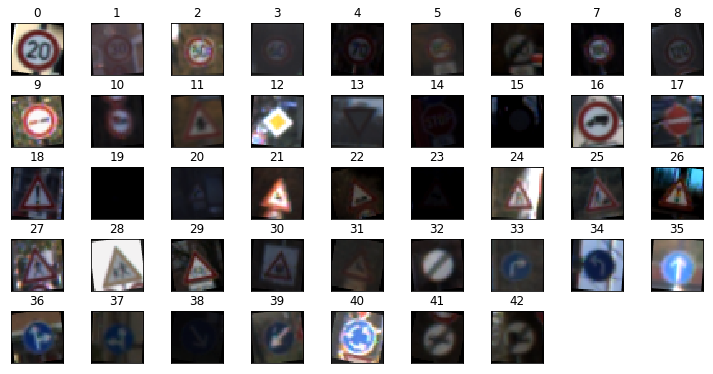

In [8]:
helpers.show_all_signs(augmented_train, n_classes)

### Model Architecture

Define inputs and outputs:

In [9]:
import tensorflow as tf

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, (None, *image_shape), name="x")
    
with tf.name_scope('output'):
    y = tf.placeholder(tf.int32, (None), name="y")
    one_hot_y = tf.one_hot(y, n_classes, name="one_hot_y")

Defined control placeholders for learning rate and keep probability:

In [10]:
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

I used LeNet 5 network from lectures, but I added two dropout layers to prevent overfitting. Global
normalization first centers each image around its mean value (see Traffic Sign Recognition with Multi-Scale Convolutional Networks). Each image is given to (-1, 1) image.

Model contains:
* normalization layer
* 2 CNN layers
* Flatten layer
* 2 hidden fully-connected layers
* output layer

Dropouts:
* after conv2
* after first fully-connected layer

In [11]:
from tensorflow.contrib.layers import flatten


def normalize(x):
    return tf.map_fn(tf.image.per_image_standardization, x)

    
def LeNet(x, channels, classes, keep_prob):
    """LeNet builds LeNet-5 DNN

    Parameters:
      - x - an input tensor
      - channels - a count of input channels (3 for RGB, 1 for Gray scale)
      - classes - a count of classes
      - keep_prob - keep probability tensor (should be 1 for validation)

    """

    # Hyperparameters
    mu = 0
    sigma = 0.1

    # normalize
    x = normalize(x)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x<channels>. Output = 28x28x6.
    with tf.name_scope('conv1'):
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1, name='activation')

        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='maxpool')

    with tf.name_scope('conv2'):
        # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2, name='activation')        

        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='maxpool')

    dropout = tf.nn.dropout(conv2, keep_prob)

    with tf.name_scope('flatten'):
        # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(dropout)

    with tf.name_scope('fc1'):
        # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1, name='activation')

    fc1 = tf.nn.dropout(fc1, keep_prob)

    with tf.name_scope('fc2'):
        # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b

        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2, name='activation')

    with tf.name_scope('fc3'):
        # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = classes.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classes), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(classes))
        logits = tf.matmul(fc2, fc3_W) + fc3_b

    logits = tf.identity(logits, name='logits')

    return logits

Build LeNet-5 network:

In [12]:
channels = 3 # I use RGB images

logits = LeNet(x, channels, n_classes, keep_prob)

### Train, Validate and Test the Model

I used softmax_cross_entropy_with_logits and mean minization (the most frequent choice for classification).

I choosed AdamOptimizer. AdamOptimizer choosed step size more more accurately and demonstrates good performance.

In [13]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, 
                                                        logits=logits, 
                                                        name='cross_entropy')

cost = tf.reduce_mean(cross_entropy, name='cost')

with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

I defined additional functions to calculate accuracy and print train logs:

In [14]:
# tensors to evaluate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='batch_accuracy')

In [15]:
def calc_accuracy(sess, x, y, keep_prob, accuracy_op, batch_size, samples):   
    total_accuracy = 0.0

    for batch in samples.batches(batch_size):
        accuracy = sess.run(accuracy_op, feed_dict={x: batch.features, y: batch.labels, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch))

    accuracy = total_accuracy / len(samples)

    return accuracy


def print_stats(sess, epoch, batch_size, train_samples, valid_samples):
    global x
    global y
    global keep_prob
    global accuracy_operation
    
    train_accuracy = calc_accuracy(sess, x, y, keep_prob, accuracy_operation, batch_size, train_samples)

    valid_accuracy = calc_accuracy(sess, x, y, keep_prob, accuracy_operation, batch_size, valid_samples)

    print("Epoch %4s: train accuracy %.3f, valid accuracy %.3f " % 
          (epoch + 1, train_accuracy, valid_accuracy))

# Hyperparameters

In [16]:
EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001
KEEP_PROBABILITY = 0.8

10 epochs is enough to reach target accuracy (> 0.93).
Batch size number based on RAM size of my Video Card.
Learning rate 0.001 looks reasonable.
Keep probability 0.8 (plus 2 dropout layers) prevent overfitting.

## Train

Train model and save it to `SAVE_MODEL_PATH`.

In [17]:
SAVE_MODEL_PATH = 'trained_model/model'

Training (requires about 10 minutes with NVidia GeForce GTX 750 Ti 2Gb):

In [18]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(EPOCHS):
        shuffled = train.shuffle()
        for batch in shuffled.batches(BATCH_SIZE):
            sess.run(optimizer,      
                     feed_dict={
                         x: batch.features, 
                         y: batch.labels, 
                         learning_rate: LEARNING_RATE, 
                         keep_prob: KEEP_PROBABILITY})
            
        print_stats(sess, epoch, BATCH_SIZE, shuffled, valid)
        
    saver.save(sess, SAVE_MODEL_PATH)
    
    test_accuracy = calc_accuracy(sess, x, y, keep_prob, accuracy_operation, BATCH_SIZE, test)
    
print('Trained with %.3f!' % test_accuracy)

Epoch    1: train accuracy 0.942, valid accuracy 0.880 
Epoch    2: train accuracy 0.968, valid accuracy 0.908 
Epoch    3: train accuracy 0.983, valid accuracy 0.918 
Epoch    4: train accuracy 0.985, valid accuracy 0.926 
Epoch    5: train accuracy 0.990, valid accuracy 0.931 
Epoch    6: train accuracy 0.993, valid accuracy 0.940 
Epoch    7: train accuracy 0.993, valid accuracy 0.943 
Epoch    8: train accuracy 0.995, valid accuracy 0.945 
Epoch    9: train accuracy 0.996, valid accuracy 0.949 
Epoch   10: train accuracy 0.997, valid accuracy 0.946 
Trained with 0.940!


## Checkpoint

Now trained model is saved to `SAVE_MODEL_PATH` and can be loaded from disk whenever (see `with_model` function below).

---

## Step 3: Test a Model on New Images

I downloaded 9 images from Web and saved to `real_signs` folder.

### Load and Output the Images

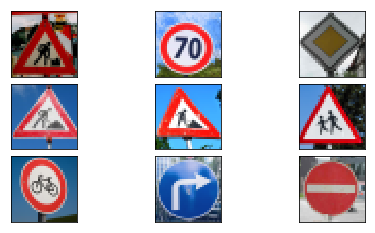

In [19]:
import os

import cv2


# Path to folder with "real-world" german signs
REAL_SIGNS_FOLDER = 'real_signs'


if not os.path.isdir(REAL_SIGNS_FOLDER):
    raise RuntimeError('oops, real_signs is not found')

    
def list_real_signs():
    """list_real_signs is a generator that returns file name for each real sign"""
    for filename in sorted(os.listdir(REAL_SIGNS_FOLDER)):
        yield os.path.join(REAL_SIGNS_FOLDER, filename)
        
        
def scale(image):
    return cv2.resize(image, (image_shape[0], image_shape[1]), interpolation = cv2.INTER_AREA)


def read_real_signs():
    """read_real_sings returns 4D array with images"""
    images = [scale(plt.imread(filename)) for filename in list_real_signs()]
    return np.array(images)


real_signs = read_real_signs()
# real_labels contains true label for each sign
real_labels = [25, 4, 12, 25, 25, 28, 29, 33, 17]

real_samples = helpers.Samples(real_signs, real_labels)

helpers.show_images(real_signs)

### Predict the Sign Type for Each Image

I use `with_model` functions to load saved model:

In [20]:
import tensorflow as tf


class Model:
    
    def __init__(self, save_model_path, top_k=5):
        self.save_model_path = save_model_path
        self.graph = tf.Graph()
        self.sess = None
        self.top_k = top_k
        
    def init(self, sess):
        self.sess = sess
        
        loader = tf.train.import_meta_graph(self.save_model_path + '.meta')
        loader.restore(sess, self.save_model_path)
        
        self.x = self.graph.get_tensor_by_name('input/x:0')
        self.y = self.graph.get_tensor_by_name('output/y:0')
        self.keep_prob = self.graph.get_tensor_by_name('keep_prob:0')
        self.logits = self.graph.get_tensor_by_name('logits:0')
        self.accuracy = self.graph.get_tensor_by_name('batch_accuracy:0')
        
    def calc_accuracy(self, batch_size, samples):
        return calc_accuracy(self.sess, self.x, self.y, self.keep_prob, self.accuracy, 
                             batch_size, samples)
    
    def predict(self, images):
        prediction = tf.nn.top_k(tf.nn.softmax(self.logits), self.top_k)
        return self.sess.run(prediction, feed_dict={self.x: images, self.keep_prob: 1.0})


def with_model(save_model_path, action):
    model = Model(save_model_path)

    with tf.Session(graph=model.graph) as sess:
        model.init(sess)
        return action(model)

# Checkpoint

Load saved model from file and print accuracy to make sure we have the same model that was trained:

In [21]:
def print_accuracy(model):
    print('Loaded model accuracy: %.3f' % model.calc_accuracy(BATCH_SIZE, test))
                
with_model(SAVE_MODEL_PATH, print_accuracy)

INFO:tensorflow:Restoring parameters from trained_model/model
Loaded model accuracy: 0.940


### Analyze Performance

In [22]:
import functools

def print_real_accuracy(model):
    print('Accuracy on real-world images: %.3f' % model.calc_accuracy(BATCH_SIZE, real_samples))

with_model(SAVE_MODEL_PATH, print_real_accuracy)

INFO:tensorflow:Restoring parameters from trained_model/model
Accuracy on real-world images: 0.667


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from trained_model/model


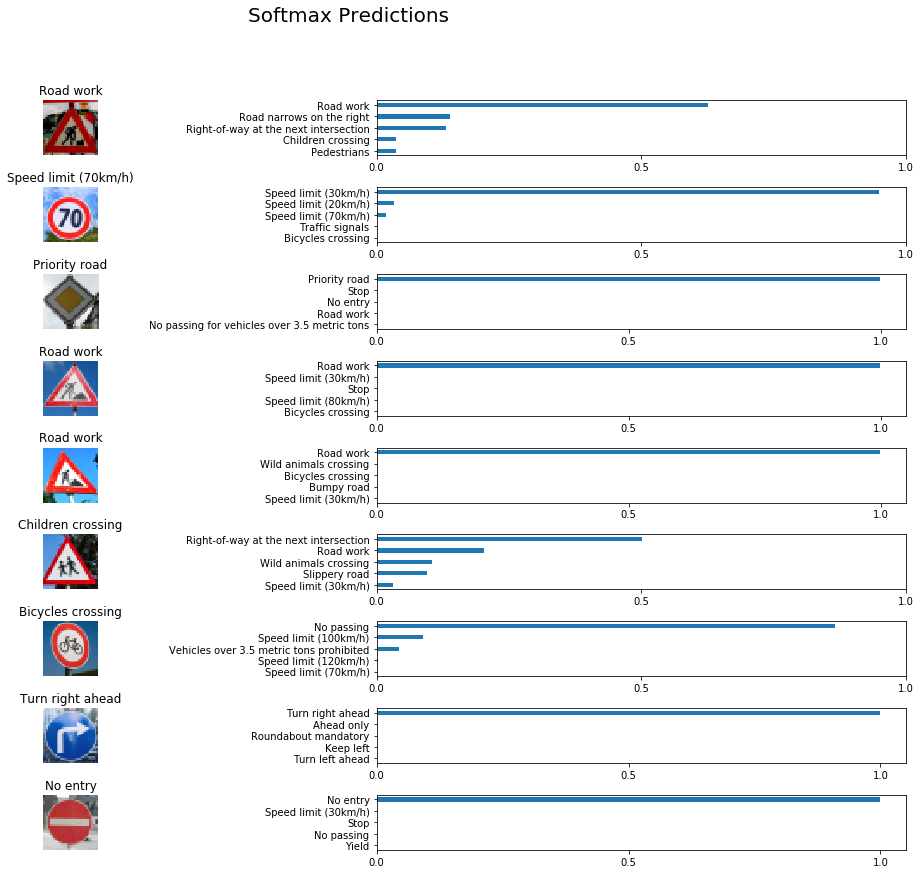

In [23]:
def predict(images, model):
    return model.predict(images)

predictions = with_model(SAVE_MODEL_PATH, 
                         functools.partial(predict, real_signs))

# Load human-readable labels from file
labels = helpers.load_labels('signnames.csv')

helpers.show_softmax_predictions(real_samples, predictions, labels, n_classes)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

I just use `outputFeatureMap` to visualize CNN layers.

In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(model, image_input, op, title, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation_tensor = op.outputs[0]
    activation = model.sess.run(activation_tensor, feed_dict={model.x: image_input, model.keep_prob: 1.0})
    assert activation is not None
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.title(title)
    plt.show()

INFO:tensorflow:Restoring parameters from trained_model/model


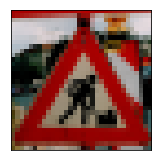

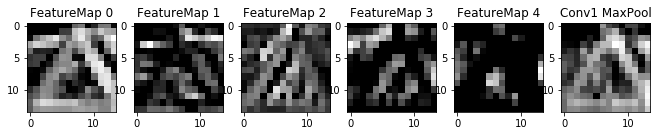

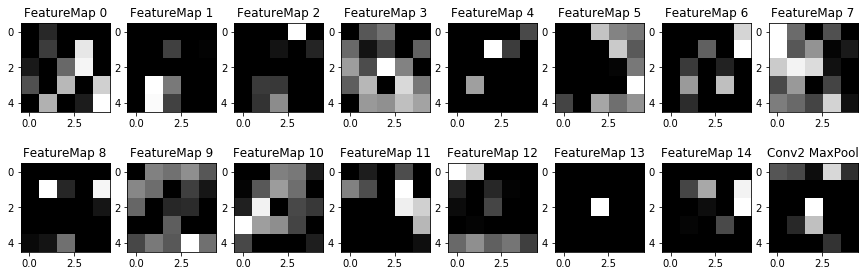

In [25]:
from functools import partial


def visualize(images, model):
    helpers.show_images(images)
    
    sess = model.sess
    
    conv1_maxpool = model.graph.get_operation_by_name('conv1/maxpool')
    conv2_maxpool = model.graph.get_operation_by_name('conv2/maxpool')
    
    outputFeatureMap(model, images, conv1_maxpool, 'Conv1 MaxPool')
    outputFeatureMap(model, images, conv2_maxpool, 'Conv2 MaxPool')
        

with_model(SAVE_MODEL_PATH, partial(visualize, real_signs[:1]))